# Polynomial regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Hyperparameters

In [2]:
POLYNOMIAL_DEGREE = 3
TOLERANCE = 1e-5
LEARNING_RATE = 0.5
REGULARIZATION = 0.01

## Initiate data

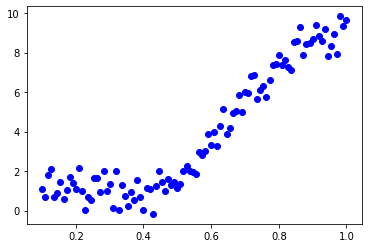

In [3]:
X = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
y = np.sin(X) + 0.1*np.power(X,2) + 0.5*np.random.randn(100,1)
X /= np.max(X)

plt.plot(X, y, 'bo')

## Split data to train and test

In [4]:
order = np.random.permutation(len(X))
portion = 20
test_x = X[order[:portion]]
test_y = y[order[:portion]]
train_x = X[order[portion:]]
train_y = y[order[portion:]]

## Train using train data

In [7]:
def get_gradient(w, x, y):
    y_estimate = x@w
    error = y.flatten() - y_estimate
    gradient = -(1.0 / len(x)) * error @ x + REGULARIZATION * w
    return gradient, error@error

w = np.random.randn(POLYNOMIAL_DEGREE + 1)

iterations = 1
    
while True:
    
    x_data = np.ones_like(train_x)
    y_data = train_y

    for i in range(1, POLYNOMIAL_DEGREE + 1):
        x_data = np.hstack((x_data, train_x**i))
    
    gradient, error = get_gradient(w, x_data, train_y)
    new_w = w - LEARNING_RATE * gradient
    
    if np.sum(abs(new_w - w)) < TOLERANCE:
        break
    
    if iterations % 10 == 0:
        print("Iteration: %d - Error: %.4f" %(iterations, error))
    
    iterations += 1
    w = new_w

Iteration: 10 - Error: 118.4130
Iteration: 20 - Error: 80.1277
Iteration: 30 - Error: 70.6726
Iteration: 40 - Error: 67.9219
Iteration: 50 - Error: 66.9622
Iteration: 60 - Error: 66.5672
Iteration: 70 - Error: 66.3789
Iteration: 80 - Error: 66.2747
Iteration: 90 - Error: 66.2074
Iteration: 100 - Error: 66.1574
Iteration: 110 - Error: 66.1163
Iteration: 120 - Error: 66.0803
Iteration: 130 - Error: 66.0477
Iteration: 140 - Error: 66.0176
Iteration: 150 - Error: 65.9896
Iteration: 160 - Error: 65.9635
Iteration: 170 - Error: 65.9390
Iteration: 180 - Error: 65.9161
Iteration: 190 - Error: 65.8946
Iteration: 200 - Error: 65.8744
Iteration: 210 - Error: 65.8555
Iteration: 220 - Error: 65.8377
Iteration: 230 - Error: 65.8210
Iteration: 240 - Error: 65.8053
Iteration: 250 - Error: 65.7906
Iteration: 260 - Error: 65.7768
Iteration: 270 - Error: 65.7638
Iteration: 280 - Error: 65.7516
Iteration: 290 - Error: 65.7401
Iteration: 300 - Error: 65.7293
Iteration: 310 - Error: 65.7191
Iteration: 320 -

## Test using test data

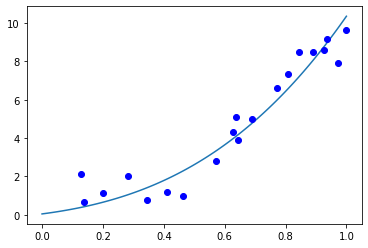

In [9]:
result = []

X_plot = np.linspace(0, 1.0, 100)
y_plot = 0
for i in range(POLYNOMIAL_DEGREE+1):
    y_plot += X_plot**i*w[i]
        
plt.plot(X_plot, y_plot)
plt.plot(test_x, test_y, 'bo')